In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
df = pd.read_csv('india_only.csv')
print("Data set has been read")

Data set has been read


In [2]:
# Separate features and target for classification
X_classification = df.drop('Value', axis=1)
y_classification = (df['Value'] > df['Value'].median()).astype(int)  # Convert to binary for Logistic Regression

# Split the data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled_c = scaler.fit_transform(X_train_c)
X_test_scaled_c = scaler.transform(X_test_c)

# Train Logistic Regression model
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_scaled_c, y_train_c)

# Predictions
y_pred_c = log_model.predict(X_test_scaled_c)

print("Results")
print("Logistic Regression Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))

ValueError: could not convert string to float: 'QC'

In [3]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_c, y_pred_c), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

NameError: name 'y_pred_c' is not defined

<Figure size 600x400 with 0 Axes>

In [11]:
X_regression = df.drop('Value', axis=1)
y_regression = df['Value']

# Split data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Scale the features
X_train_scaled_r = scaler.fit_transform(X_train_r)
X_test_scaled_r = scaler.transform(X_test_r)

# Train Linear Regression model
lin_model = LinearRegression()
lin_model.fit(X_train_scaled_r, y_train_r)

# Predictions
y_pred_r = lin_model.predict(X_test_scaled_r)

# Results
print("Linear Regression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test_r, y_pred_r))
print("R-squared Score:", r2_score(y_test_r, y_pred_r))

Linear Regression Metrics:
Mean Squared Error: 5284730740.375632
R-squared Score: 0.09689111001074346


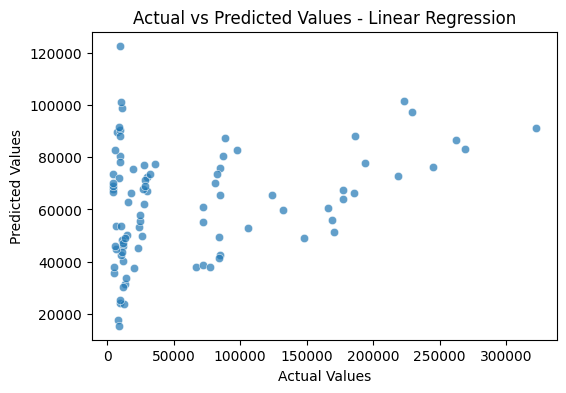

In [13]:
# Scatter Plot of Actual vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_r, y=y_pred_r, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values - Linear Regression")
plt.show()